In [1]:
# Load libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns 
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("states.csv")
df.head()

,COUNTY,STATE,High school graduate,Associates degree,Bachelors degree,High school graduate or higher,Bachelors degree or higher,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999"
0,Alameda County,California,17.0,6.4,28.1,88.8,48.7,5.2,0.3,12.0,11.2,17.9
1,Alpine County,California,28.7,5.6,19.8,95.3,38.4,12.1,3.4,18.6,10.3,28.5
2,Modoc County,California,31.8,9.2,12.2,84.7,18.2,17.3,2.5,23.6,13.5,10.4
3,Amador County,California,30.0,13.4,12.3,91.2,18.1,9.9,2.1,19.3,13.8,16.2
4,Butte County,California,22.6,10.5,18.4,89.7,28.3,10.3,0.8,16.1,11.7,13.5


In [2]:
X = df.drop(columns=['COUNTY','STATE','$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999','$100,000 to $149,999']).copy()
y = df[['$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999','$100,000 to $149,999']].reset_index(drop=True)

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == float
y


,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999"
0,5.2,0.3,12.0,11.2,17.9
1,12.1,3.4,18.6,10.3,28.5
2,17.3,2.5,23.6,13.5,10.4
3,9.9,2.1,19.3,13.8,16.2
4,10.3,0.8,16.1,11.7,13.5
...,...,...,...,...,...
308,12.0,1.6,17.5,12.4,12.1
309,12.3,2.9,17.9,10.8,15.0
310,16.3,4.2,11.4,9.7,4.9
311,12.4,5.7,14.2,8.9,3.7


In [3]:
from sklearn.cluster import KMeans
# Create cluster feature
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()




,High school graduate,Associates degree,Bachelors degree,High school graduate or higher,Bachelors degree or higher,Cluster
0,17.0,6.4,28.1,88.8,48.7,2
1,28.7,5.6,19.8,95.3,38.4,0
2,31.8,9.2,12.2,84.7,18.2,4
3,30.0,13.4,12.3,91.2,18.1,4
4,22.6,10.5,18.4,89.7,28.3,0


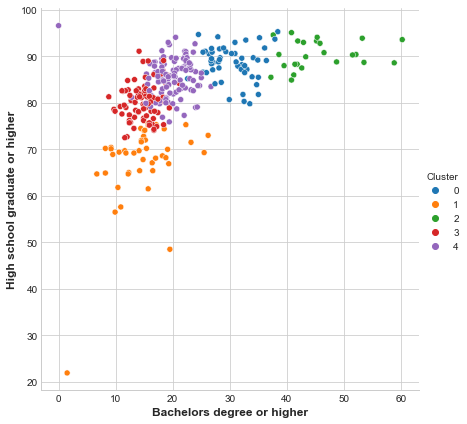

In [4]:
sns.relplot(
    x="Bachelors degree or higher", y="High school graduate or higher", hue="Cluster", data=X, height=6,
);

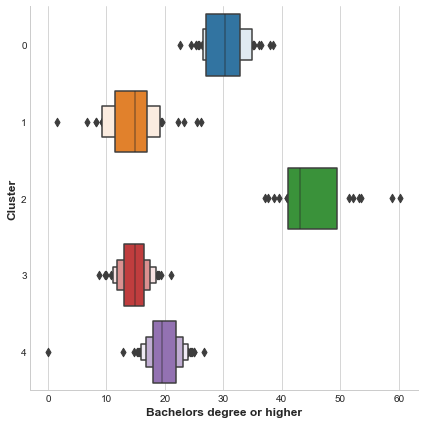

In [5]:
#X["Bachelors degree or higher"] = df["Bachelors degree or higher"]
sns.catplot(x="Bachelors degree or higher", y="Cluster", data=X, kind="boxen", height=6);

In [6]:
X

,High school graduate,Associates degree,Bachelors degree,High school graduate or higher,Bachelors degree or higher,Cluster
0,17.0,6.4,28.1,88.8,48.7,2
1,28.7,5.6,19.8,95.3,38.4,0
2,31.8,9.2,12.2,84.7,18.2,4
3,30.0,13.4,12.3,91.2,18.1,4
4,22.6,10.5,18.4,89.7,28.3,0
...,...,...,...,...,...,...
308,33.1,7.2,12.2,85.6,19.2,4
309,30.4,4.8,16.5,84.8,23.6,4
310,30.6,5.1,11.1,64.7,12.2,1
311,35.0,6.5,7.0,75.7,12.4,3


In [7]:
Y = X['Cluster']
X = X.drop(columns = ['Cluster']).copy()


validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
        X, Y, test_size = validation_size, random_state = seed)
    
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [8]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver ='liblinear', multi_class ='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma ='auto')))
 
# evaluate each model in turn
results = []
names = []
 
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed,shuffle=True)
    cv_results = model_selection.cross_val_score(
            model, X_train, Y_train, cv = kfold, scoring = scoring,error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "% s: % f (% f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:  0.688000 ( 0.099277)
LDA:  0.880000 ( 0.053666)
KNN:  0.944000 ( 0.044542)
CART:  0.848000 ( 0.049960)
NB:  0.932000 ( 0.047497)
SVM:  0.668000 ( 0.084000)


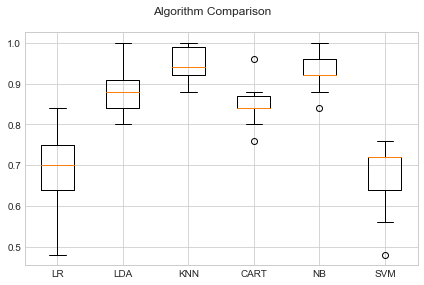

In [9]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9682539682539683
[[10  0  0  0  0]
 [ 0  8  0  0  1]
 [ 0  0  4  0  0]
 [ 0  1  0 19  0]
 [ 0  0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         4
           3       1.00      0.95      0.97        20
           4       0.95      1.00      0.98        20

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

